In [1]:
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

In [2]:
class Environment_obstacle(object):
    def __init__(self, width):
      self.width =width
      self.map = np.zeros((width*1,width*1))
      self.obstacle_state= random.sample(range(1, width-1), 2)
      self.map[self.obstacle_state[0]][self.obstacle_state[1]]=1

In [3]:
class Robot(object):
    def __init__(self, x, space_env, radius,  v_speed = 1.0, w_speed = math.pi/8):

      self.state=x

      #direction is in radians
      self.dir = 0
      self.v_speed = v_speed

      #angular speed is in radians/step
      self.w_speed = w_speed
      self.env = space_env
      self.radius = radius

    def step(self):
      new_state = self.state + self.v_speed * np.array([np.cos(self.dir),np.sin(self.dir)])
      obstacle = False
      collision=False
      if new_state[0]>self.env.width-self.radius or new_state[0]<self.radius or new_state[1]>self.env.width-self.radius or new_state[1]<self.radius:
        self.dir = -self.dir
        collision=True

      if abs(new_state[0]-self.env.obstacle_state[0]) <= self.radius and abs(new_state[1]- self.env.obstacle_state[1]) <= self.radius:
        obstacle = True

      if collision:
        duration = random.randint(2, 10)
        for i in range(duration):
          self.dir += self.w_speed
      
      self.state[0] = min(max(new_state[0],self.radius),self.env.width-self.radius)
      self.state[1] = min(max(new_state[1],self.radius),self.env.width-self.radius)
      self.env.map[round(self.state[0])][round(self.state[1])]=0.5
        
      return obstacle

In [25]:
def create_robot(square_width=20,robot_radius=1):
  if robot_radius>square_width/4:
    print("Not enough space, overwriting... ")
    square_width=20
    robot_radius=1

  x0=np.array([square_width/2, square_width/2])
  space_env = Environment_obstacle(square_width)
  robot = Robot(x0, space_env, robot_radius)
  return robot

In [26]:
robot = create_robot()

In [27]:
obstacle = False
for i in range(1000):
      obstacle = robot.step()
      if obstacle:
          print("Obstacle found around ",robot.state)
          break

Obstacle found around  [11.16267486 15.17316568]


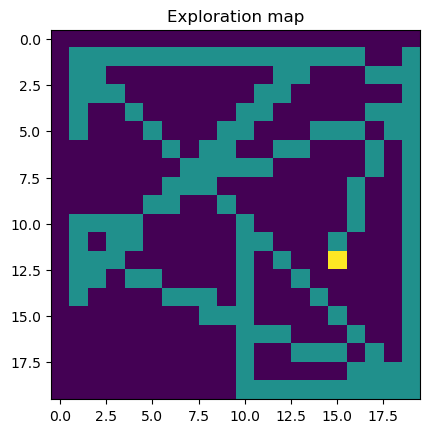

In [29]:
plt.title("Exploration map")
plt.imshow(robot.env.map)